In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [2]:
df_inicial = pd.read_csv("insurance.csv")
df_inicial.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df_inicial.info()
df_inicial.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
df_cat = df_inicial[["sex", "smoker", "region"]]
df_num = df_inicial[["age", "bmi", "children", "charges"]]

In [5]:
df_inicial.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

e:\Apps\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Apps\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Apps\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Apps\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

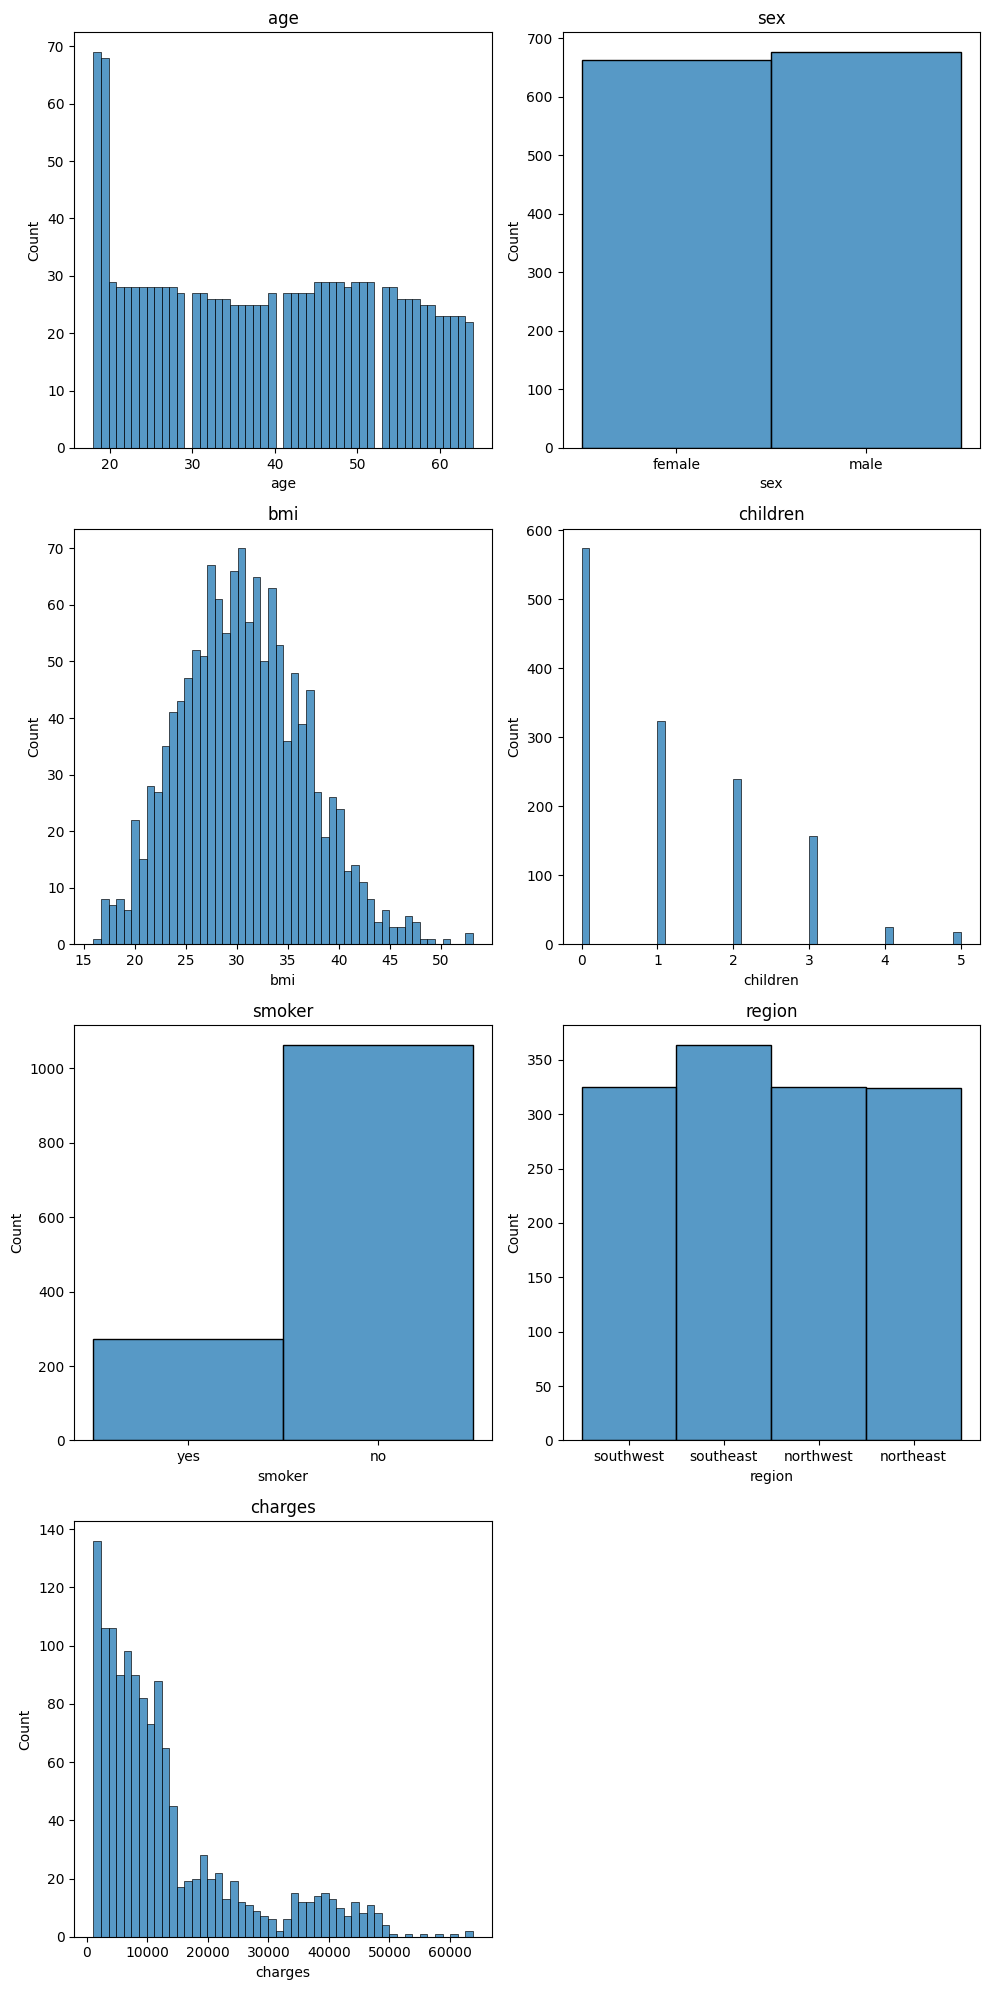

In [6]:
df_graficas_iniciales = df_inicial.copy()

# Calcular el número de columnas y filas necesarias
num_columns = len(df_graficas_iniciales.columns)
num_rows = 4  # Número de filas que deseas tener, puedes ajustar esto
num_cols_per_row = (num_columns + num_rows - 1) // num_rows  # Redondeo hacia arriba

# Ajustar el tamaño de la figura dinámicamente
figsize_x = num_cols_per_row * 5
figsize_y = num_rows * 5

fig, ax = plt.subplots(num_rows, num_cols_per_row, figsize=(figsize_x, figsize_y))

# Asegurarse de que ax sea siempre una lista de listas
if num_rows == 1:
    ax = [ax]
if num_cols_per_row == 1:
    ax = [[a] for a in ax]

# Iterar sobre las columnas para crear los subgráficos
for idx, col in enumerate(df_graficas_iniciales.columns):
    row = idx // num_cols_per_row
    col_pos = idx % num_cols_per_row
    sns.histplot(df_graficas_iniciales.iloc[:, idx], ax=ax[row][col_pos], bins=50)
    ax[row][col_pos].set_title(df_graficas_iniciales.columns[idx])

# Eliminar los subgráficos vacíos
for i in range(num_columns, num_rows * num_cols_per_row):
    fig.delaxes(ax[i // num_cols_per_row][i % num_cols_per_row])

plt.tight_layout()
plt.show()

e:\Apps\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Apps\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Apps\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Apps\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

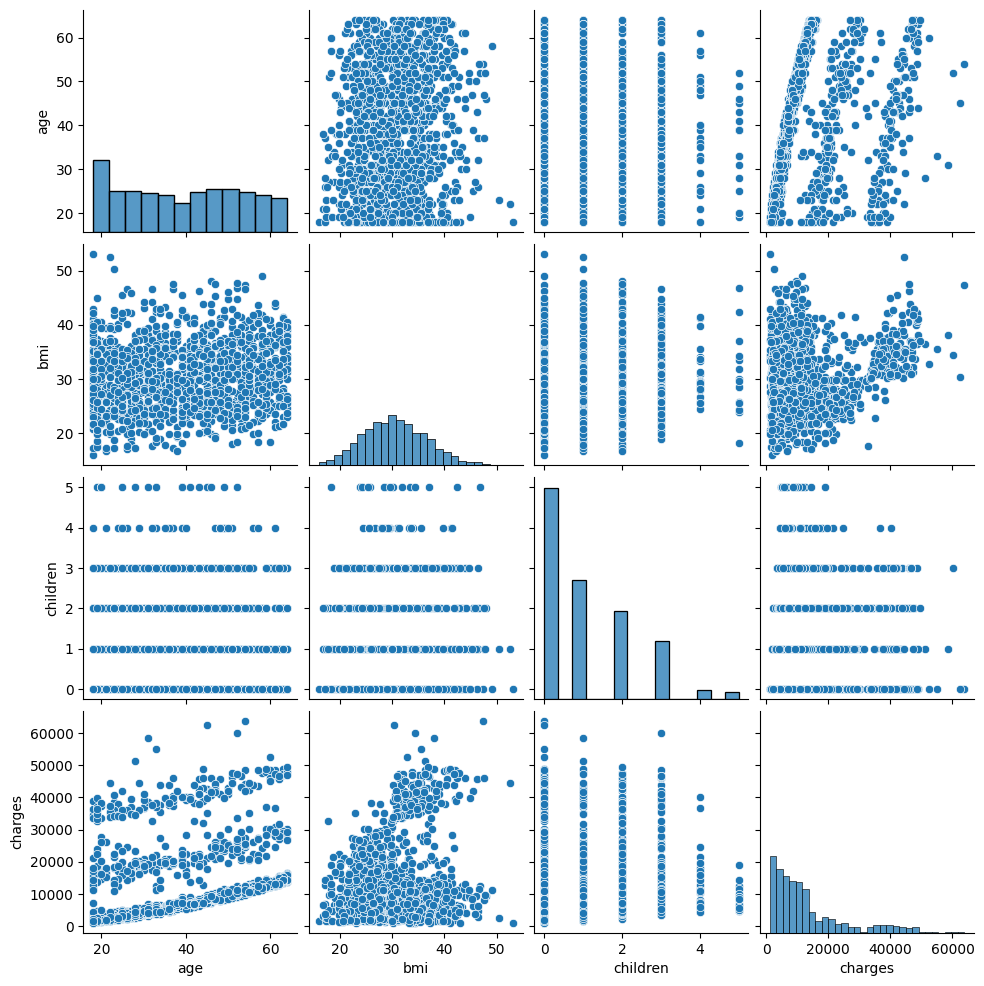

In [7]:
sns.pairplot(df_inicial)
plt.show()

e:\Apps\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Apps\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Apps\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Apps\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

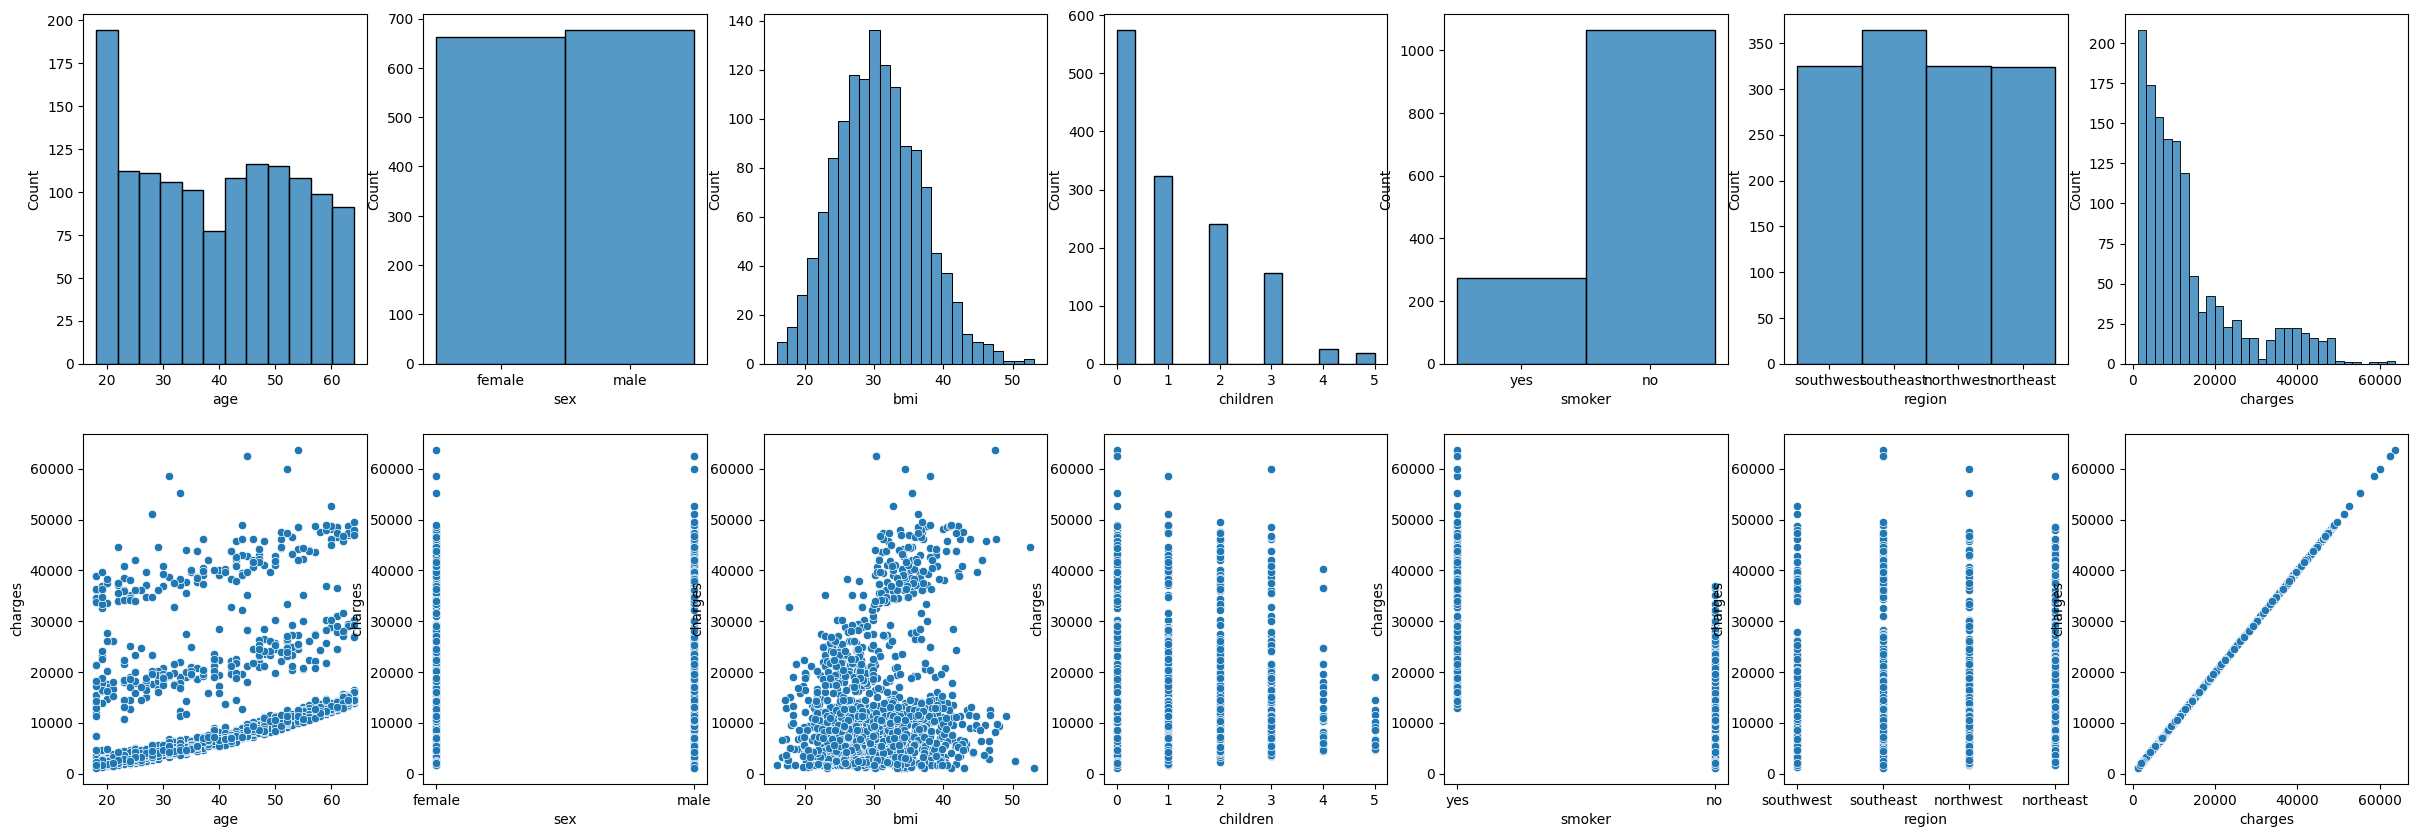

In [8]:
#creo subgráficos con seaborn
cols = df_inicial.columns
fig, ax = plt.subplots(2,len(cols), figsize=(30,10))
i=0
for elem in cols:
    sns.histplot(df_inicial[elem], ax=ax[0][i])
    i+=1
    # sns.boxplot(data=df[elem], ax=ax[0][i], orient="h", width=0.4)
    # ax[0].set_xlabel(elem)
i=0
    
for elem in cols:
    sns.scatterplot(x=df_inicial[elem],y=df_inicial["charges"], ax=ax[1][i])
    # ax[0].set_xlabel(elem)
    i+=1

plt.show()